##### Importing Libraries


In [535]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(suppress = True)

##### Function to Normalize Data

In [536]:
def minmaxNormalize(X):
    X_norm = X
    for i in range(0,X.shape[1]-1):
        if np.max(X[:,i]) != np.min(X[:,i]):
            X_norm[:,i] = (X[:,i] - np.min(X[:,i])) / (np.max(X[:,i]) - np.min(X[:,i]))
#         elif np.max(X[:,i] == np.min(X[:,i])):
#             X_norm[:,i] = np.ones(X_norm[:,i].shape)
    return X_norm

##### Loading Train and Test data

In [537]:
# Train Data
with open('p1_train.csv', 'r') as f:
    results = []
    for line in f:
        words = line.split(',')
        # appending 1 to allocate bias
        for i in range(len(words)):
            words[i] = float(words[i])
        results.append(words)

Data_f = np.array(results[0:4000]) #train data has been reduced to overfit
results=minmaxNormalize(Data_f)

In [628]:
y_train = results[:,[2]]
X_train = np.delete(results, 2, axis = 1)

In [540]:
# Test Data
with open('p1_test.csv', 'r') as f:
    results1 = []
    for line in f:
        words = line.split(',')
        # appending 1 to allocate bias
        for i in range(len(words)):
            words[i] = float(words[i])
        results1.append(words)

In [541]:
Data_f = np.array(results1[0:100])
results1=minmaxNormalize(Data_f)

In [542]:
y_test = results1[:,[2]]
X_test = np.delete(results1, 2, axis = 1)

##### MSE loss with various regularizers

In [544]:
# MSE loss
def MSEloss(X, y, W):
    return (1 / X.shape[0]) * (np.linalg.norm(np.matmul(X, W) - y) ** 2)

In [603]:
def MSEloss_L2(X, y, W,reg):
    return ((1 / X.shape[0]) * np.linalg.norm(np.matmul(X, W) - y) ** 2)+((reg/2)*(np.sum(W**2)))

In [546]:
def MSEloss_L1(X, y, w, alpha):
    n_samples = len(y)
    y_pred = np.dot(X, w)
    residuals = y_pred - y
    mse = np.sum(residuals ** 2) / n_samples
    l1_penalty = alpha * np.sum(np.abs(w))
    cost = mse + l1_penalty
    return cost


In [588]:
def MSEloss_L1_L2(X, y, w, alpha, l1_ratio=0.5):
    n_samples = len(y)
    y_pred = np.dot(X, w)
    residuals = y_pred - y
    mse = np.sum(residuals ** 2) / ( n_samples)
    l1_penalty = alpha * l1_ratio * np.sum(np.abs(w))
    l2_penalty = alpha * (1 - l1_ratio) * np.sum(w ** 2)
    cost = mse + l1_penalty + l2_penalty
    return cost

##### Normal equations with and with out L2 regularization

In [547]:
def normal_equation(X,y):
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    return theta

In [609]:
def normal_equation_L2(X,y,reg):
    L2_reg = reg*np.eye(X.shape[1])
    theta = np.dot(np.linalg.inv(X.T.dot(X) + L2_reg), np.dot(X.T, y))
    return theta

##### Function to generate n'th degree polynomial kernel

In [549]:
def generate_polynomial(X, n):
    m = X.shape[0]
    X_polynomial = np.ones((m, (n+1)*(n+2)//2))
    index = 0
    for i in range(n+1):
        for j in range(i+1):
            X_polynomial[:, index] = (X[:, 0]**(i-j)) * (X[:, 1]**j)
            index += 1
    return X_polynomial

### BIAS VARIANCE CURVE WITH MODEL COMPLEXTIES RANGING FROM 1ST DEGREE TO 12TH DEGREE

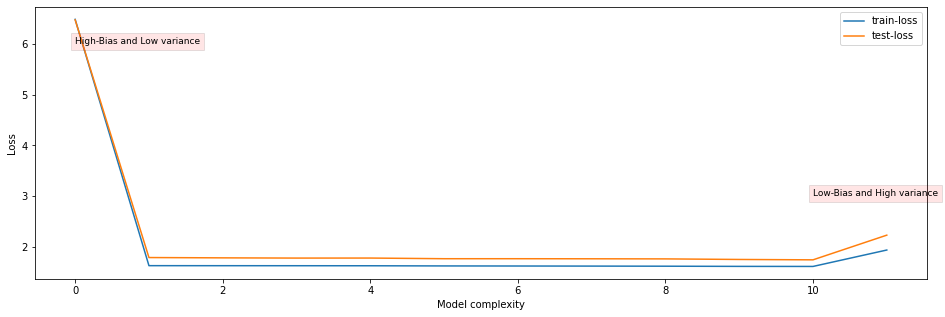

In [649]:
Z = np.arange(0,12,1)
train_loss=[]
test_loss=[]
fig = plt.figure(figsize=(16, 5))
for item in Z:
    X1 = generate_polynomial(X_train,item)
    #print(X1.shape)
    W_optimum = normal_equation(X1, y_train)
    train_loss.append(MSEloss(X1, y_train, W_optimum))
    #test_loss.append(MSEloss(X2, y_test, W_optimum))
    #print(MSEloss(X1, y_train, W_optimum))
    X2 = generate_polynomial(X_test,item)
    #W_optimum = normal_equation(X2, y_test)
    test_loss.append(MSEloss(X2, y_test, W_optimum))
    #test_loss.append(MSEloss(X2, y_test, W_optimum))
    #print(MSEloss(X2, y_test, W_optimum))
plt.text(10,3, 'Low-Bias and High variance', fontsize=9, bbox=dict(facecolor='red', alpha=0.1))
plt.text(0,6, 'High-Bias and Low variance', fontsize=9, bbox=dict(facecolor='red', alpha=0.1))
#plt.text(11,3, 'High-variance', fontsize=9, bbox=dict(facecolor='red', alpha=0.1))
#plt.text(11,3, 'High-variance', fontsize=9, bbox=dict(facecolor='red', alpha=0.1))
plt.plot(Z,np.log(train_loss),label='train-loss')
plt.plot(Z,np.log(test_loss),label='test-loss')
plt.xlabel('Model complexity')
plt.ylabel('Loss')
plt.legend()



* <b> From the above bias variance curve we can see that after increasing model complexity after a certain extent the test error started increasing . Intially the test error is high( High Bias- Low variance : Underfitting) and test error starts decreasing and after a certain point the curve enters (Low Bias- High variance : Overfitting) region.

## Overfitting the data with 3 over parametrized models

In [657]:
Z = [20,30,40]
train_loss=[]
test_loss=[]
fig = plt.figure(figsize=(16, 5))
for item in Z:
    X1 = generate_polynomial(X_train,item)
    W_optimum = normal_equation(X1, y_train)
    train_loss.append(MSEloss(X1, y_train, W_optimum))
    X2 = generate_polynomial(X_test,item)
    test_loss.append(MSEloss(X2, y_test, W_optimum))
    print("Test MSE with {}th degree polynomial model:{}".format(item,MSEloss(X2,y_test,W_optimum)))



Test MSE with 20th degree polynomial model:171354.9900518428
Test MSE with 30th degree polynomial model:189685.32968305465
Test MSE with 40th degree polynomial model:5058173.575622894


<Figure size 1152x360 with 0 Axes>

# L2 regularizer


Best lambda is: 0.001
MSE at best lambda: 20.35514993653146
MSE without Regularization for an 20th degree polynomial overfit model: 171354.9900518428
MSE with L2 Regularization for an 20th degree polynomial overfit model: 20.35514993653146


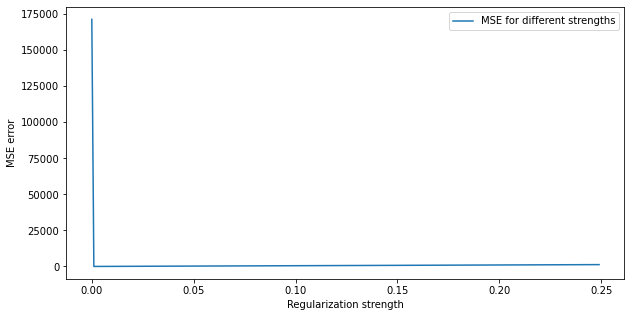

In [650]:
alphas = np.round_(np.arange(0,0.25,0.001), decimals = 3)
fig = plt.figure(figsize=(10, 5))
#alphas=[2]
train_loss=[]
test_loss=[]
Z=20
for reg in alphas:
    X1 = generate_polynomial(X_train,Z)
    W_optimum = normal_equation_L2(X1, y_train,reg)
    train_loss.append(MSEloss_L2(X1, y_train, W_optimum,reg))
    #test_loss.append(MSEloss(X2, y_test, W_optimum))
    #print(MSEloss(X1, y_train, W_optimum))
    X2 = generate_polynomial(X_test,Z)
    #W_optimum = normal_equation_L2(X2, y_test,reg)
    test_loss.append(MSEloss_L2(X2, y_test, W_optimum,reg))
plt.plot(alphas,test_loss,label='MSE for different strengths')
plt.xlabel("Regularization strength")
plt.ylabel("MSE error")
best_lambda=alphas[np.argmin(test_loss)]
print('\033[1m'+"Best lambda is:",best_lambda)
print('\033[1m' +"MSE at best lambda:",test_loss[np.argmin(test_loss)])
print('\033[1m' +"MSE without Regularization for an 20th degree polynomial overfit model:",test_loss[0])
print('\033[1m' +"MSE with L2 Regularization for an 20th degree polynomial overfit model:",test_loss[np.argmin(test_loss)])
#print(test_loss)
plt.legend()
plt.show()


* <b>The above graph plots MSE error for different regularization strength parameter varying from 0 to 0.15. The best MSE is achieved around lambda=0.001. Note that regularization strength 0 indicates no regularization.
    
    
* <b> We can observe MSE for overfit 20th degree polynomial, the L2 regularization brought down the MSE from 171354.99 to 20.355 
    
</b>

# L1 Regularization


### Imposing L1 regularization for a 20th degree overfit Polynomial Model


In [580]:
def l1(X, y, alpha, learning_rate=1, num_iterations=10000):
    m, n = X.shape
    theta = np.zeros((n,1))
    v=np.zeros((n, 1))  
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    epsilon = 1e-8
    initial_learning_rate=learning_rate
    for i in range(num_iterations):
        # Compute cost and gradient with L1 regularization
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = X.T.dot(error)
        l1_penalty = alpha * np.sign(theta)
        grad_with_reg = gradient + l1_penalty
        m_t = 0.9 * m_t + 0.1 * grad_with_reg
        v_t = 0.999 * v_t + 0.001 * (grad_with_reg ** 2)
        m_t_hat = m_t / (1 - 0.9 ** (i+1))
        v_t_hat = v_t / (1 - 0.999 ** (i+1))
        theta -= alpha * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
    return theta

* This implementation uses the ADAM optimization algorithm with L1 regularization. The l1 function takes as input the input matrix X of shape (m, n) where m is the number of examples and n is the number of features, the target vector y of shape (m, 1), the regularization parameter alpha, the learning rate learning_rate and the number of iterations num_iterations.

* The function initializes the model parameters theta to zeros, and then iteratively updates theta using the ADAM algorithm. The algorithm maintains moving averages of the gradients and the squared gradients, and then updates theta by dividing the moving average of the gradients by the root mean squared error of the gradients. The L1 penalty is added to the gradient to perform L1 regularization.

* Note that this implementation also uses a momentum term with a decay rate of 0.9, and a squared gradient decay rate of 0.999.

Best lamda is: 0.012
MSE without Regularization: 655.6064407915795
MSE at best Regularization Strength with L1 Regularization: 16.076693358479712


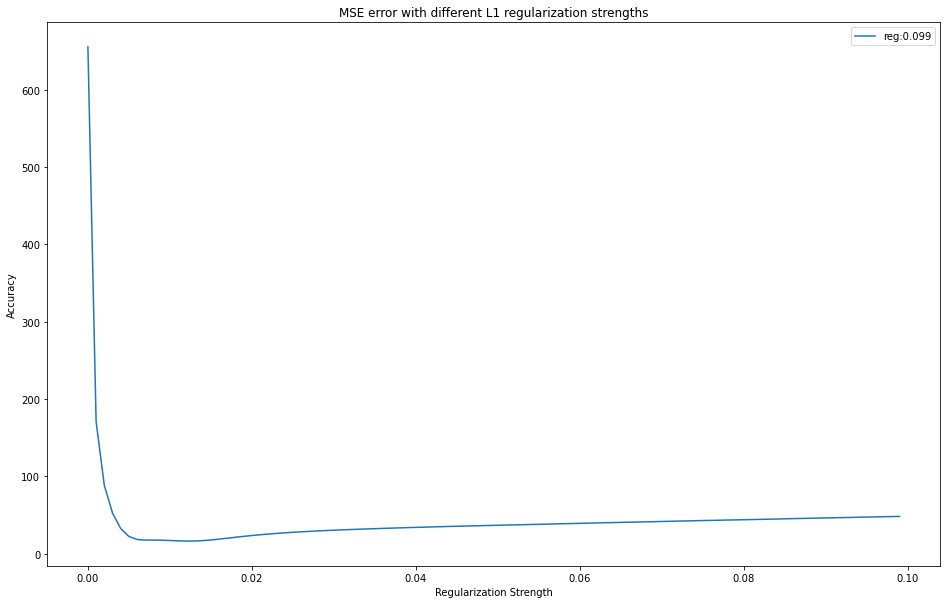

In [591]:
alphas = np.round_(np.arange(0,0.1,0.001), decimals = 3)
#alphas= np.logspace(-5, 0, num=20)
fig = plt.figure(figsize=(16, 10))
#alphas=[2]
train_loss=[]
test_loss=[]
Z=20
for reg in alphas:
    X1 = generate_polynomial_features(X_train,Z)
    W_optimum = l1(X1, y_train,reg,1e-5)
    train_loss.append(MSEloss_L1(X1, y_train, W_optimum,reg))
    X2 = generate_polynomial_features(X_test,Z)
    #W_optimum = l1(X2, y_test,reg,1e-7)
    test_loss.append(MSEloss_L1(X2, y_test, W_optimum,reg))
plt.plot(alphas,test_loss,label=f'reg:{reg}')
best_lambda=alphas[np.argmin(test_loss)]
print('\033[1m' +"Best lambda is:",best_lambda)
print('\033[1m' +"MSE without Regularization:",test_loss[0])
print('\033[1m' +"MSE at best Regularization Strength with L1 Regularization:",test_loss[np.argmin(test_loss)])

plt.title('MSE error with different L1 regularization strengths')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



* <b>The above graph plots MSE error for different regularization strength parameter varying from 0 to 0.1. The best MSE is achieved around lambda=0.012. Note that regularization strength 0 indicates no regularization.</b>
    
* <b>We can observe MSE for overfit 20th degree polynomial, the L1 regularization brought down the MSE from 655.606 to 16.07
    
</b>

###### Observation: The weight coefficients for L1 regularization are given below

In [593]:
W_optimum = l1(X1, y_train,best_lambda)

Text(0.5, 1.0, 'Weight Coefficients for L1 regularization')

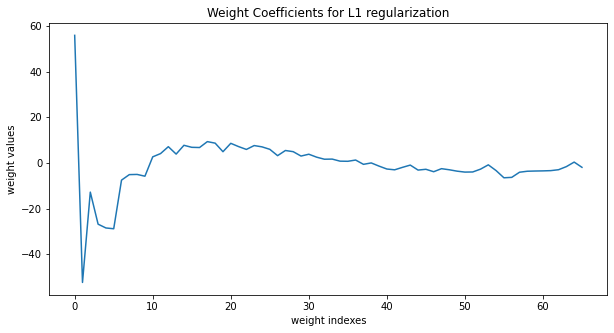

In [595]:
fig = plt.figure(figsize=(10, 5))
plt.plot(W_optimum)
plt.xlabel('weight indexes')
plt.ylabel('weight values')
plt.title('Weight Coefficients for L1 regularization')

* <b>The L1 regularization penalty encourages the model to have sparse coefficients, meaning that it tries to drive some of the coefficients to zero.

* <b>This can be observed from above graph which plots weight coeffecients.Most of the coefficients are near to zero </b>

# L1 and L2 Regularization

### Imposing L1 and L2 regularization for a 20th degree overfit Polynomial

In [596]:
def l1andl2(X, y, alpha, learning_rate=1,l1_ratio=0.5, num_iterations=10000):
    m, n = X.shape
    theta = np.zeros((n,1))
    v=np.zeros((n, 1))  
    m_t = np.zeros_like(theta)
    v_t = np.zeros_like(theta)
    epsilon = 1e-8
    initial_learning_rate=learning_rate
    for i in range(num_iterations):
        # Compute cost and gradient with L1 regularization
        y_pred = X.dot(theta)
        error = y_pred - y
        gradient = X.T.dot(error)
        l1_penalty = alpha *l1_ratio * np.sign(theta)
        l2_penalty = alpha * (1 - l1_ratio) * theta
        grad_with_reg = gradient + l1_penalty + l2_penalty
        m_t = 0.9 * m_t + 0.1 * grad_with_reg
        v_t = 0.999 * v_t + 0.001 * (grad_with_reg ** 2)
        m_t_hat = m_t / (1 - 0.9 ** (i+1))
        v_t_hat = v_t / (1 - 0.999 ** (i+1))
        theta -= alpha * m_t_hat / (np.sqrt(v_t_hat) + epsilon)
    return theta

Best lamda is: 0.005
MSE without Regularization: 655.6064407915795
MSE at best Regularization Strength with L1+L2 Regularization: 45.83062899639272


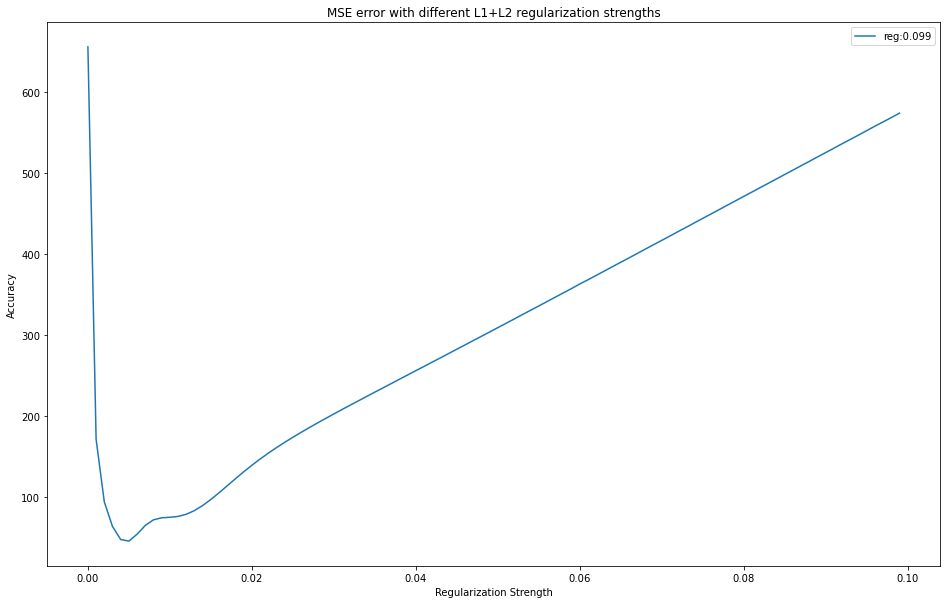

In [597]:
alphas = np.round_(np.arange(0,0.1,0.001), decimals = 3)
fig = plt.figure(figsize=(16, 10))
#alphas=[2]
train_loss=[]
test_loss=[]
Z=20
for reg in alphas:
    X1 = generate_polynomial_features(X_train,Z)
    W_optimum = l1andl2(X1, y_train,reg,1e-5)
    train_loss.append(MSEloss_L1_L2(X1, y_train, W_optimum,reg))
    X2 = generate_polynomial_features(X_test,Z)
    test_loss.append(MSEloss_L1_L2(X2, y_test, W_optimum,reg))
plt.plot(alphas,test_loss,label=f'reg:{reg}')
best_lambda=alphas[np.argmin(test_loss)]
print('\033[1m' +"Best lambda is:",best_lambda)
print('\033[1m' +"MSE without Regularization:",test_loss[0])
print('\033[1m' +"MSE at best Regularization Strength with L1+L2 Regularization:",test_loss[np.argmin(test_loss)])

plt.title('MSE error with different L1+L2 regularization strengths')
plt.xlabel('Regularization Strength')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



* <b>The above graph plots MSE error for different regularization strength parameter varying from 0 to 0.1. The best MSE is achieved around lambda=0.005. Note that regularization strength 0 indicates no regularization.</b>
    
* The l1_ratio is a hyperparameter used in the Elastic Net regularization technique that controls the balance between the L1 and L2 regularization. It is defined as the ratio of the L1 penalty to the total penalty, which includes both the L1 and L2 penalties. The l1_ratio value should be between 0 and 1, where 0 corresponds to pure L2 regularization and 1 corresponds to pure L1 regularization. Values between 0 and 1 correspond to a mix of L1 and L2 regularization.


* <b> 
We can observe MSE for overfit 20th degree polynomial, the L1+L2 regularization brought down the MSE from 655.606 to 45.827.</b>
    
